<a href="https://colab.research.google.com/github/Dimitri250/mathematics-for-machine-learning-summative/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mobile Price Prediction using Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
import joblib

In [ ]:
#Loading the dataset
data = pd.read_csv('Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Extracurricular Activities' column
data['Extracurricular Activities'] = data['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
# Display the first few rows of the dataframe to check the changes
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## Date exploration


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [ ]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


<Axes: >

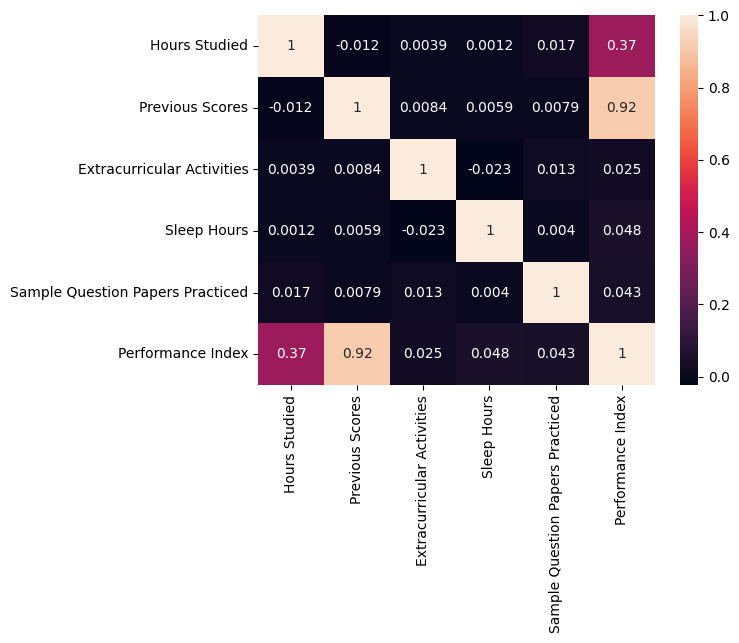

In [ ]:
# creating a heat map to see a better correlation between the features and the price
sns.heatmap(data.corr(), annot=True)

In [ ]:
X = data.drop('Performance Index', axis='columns')
Y = data['Performance Index']


In [ ]:
# Scale our features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=101)

In [ ]:
# creating the model

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# lets make predictions and determine our model accuracy
Y_pred = model.predict (X_test)
mean_abl_err = mean_absolute_error(Y_test, Y_pred)
print(mean_abl_err)

mean_sq_err = np.sqrt(mean_absolute_error(Y_test, Y_pred))
print(mean_sq_err)
# percentage score
print(model.score( X_test, Y_test)*100)

1.6120062117462681
1.2696480660979514
98.89071876349983


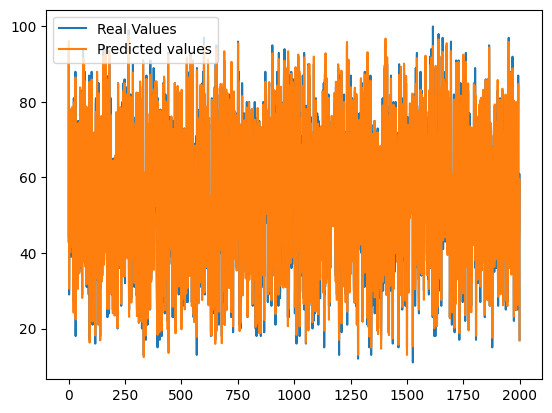

In [ ]:
# Visualising the charts of my data and prediction
Y_test_values = Y_test.values.flatten()

plt.plot(Y_test_values, label="Real Values")
plt.plot(Y_pred, label='Predicted values')
plt.legend()
plt.show()



In [ ]:
# Saving the model
joblib.dump(model,'studentperfomance.joblib')


['studentperfomance.joblib']

In [ ]:
# saving the scaler
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']